In [1]:
%reset
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
from opts import Lion

class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )
    
  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
  
if __name__ == '__main__':
  
  # Set fixed random number seed
  torch.manual_seed(42)
  
  # Prepare CIFAR-10 dataset
  dataset = CIFAR10(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  
  # Initialize the MLP
  mlp = MLP()
  
  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  # Adam
  # optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)
  optimizer = Lion(mlp.parameters(), lr=3e-5, weight_decay=1.)
  # Run the training loop
  losses = []
  for epoch in range(0, 50): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get inputs
      inputs, targets = data
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      dicts = optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          losses.append(current_loss/500)
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

Nothing done.
Files already downloaded and verified
Starting epoch 1
Size: torch.Size([64, 3072])
Size: torch.Size([64])
Size: torch.Size([32, 64])
Size: torch.Size([32])
Size: torch.Size([10, 32])
Size: torch.Size([10])
Size: torch.Size([64, 3072])
Size: torch.Size([64])
Size: torch.Size([32, 64])
Size: torch.Size([32])
Size: torch.Size([10, 32])
Size: torch.Size([10])
Size: torch.Size([64, 3072])
Size: torch.Size([64])
Size: torch.Size([32, 64])
Size: torch.Size([32])
Size: torch.Size([10, 32])
Size: torch.Size([10])
Size: torch.Size([64, 3072])
Size: torch.Size([64])
Size: torch.Size([32, 64])
Size: torch.Size([32])
Size: torch.Size([10, 32])
Size: torch.Size([10])
Size: torch.Size([64, 3072])
Size: torch.Size([64])
Size: torch.Size([32, 64])
Size: torch.Size([32])
Size: torch.Size([10, 32])
Size: torch.Size([10])
Size: torch.Size([64, 3072])
Size: torch.Size([64])
Size: torch.Size([32, 64])
Size: torch.Size([32])
Size: torch.Size([10, 32])
Size: torch.Size([10])
Size: torch.Size([6

KeyboardInterrupt: 

In [47]:

for i in range(5):
    print(dicts["p"][i].shape)
# print(dicts["p"][1])
# print(dicts["grad"][1])
# torch.stack((dicts["p"][1], dicts["grad"][1]))


torch.Size([196608])
torch.Size([64])
torch.Size([2048])
torch.Size([32])
torch.Size([320])


In [1]:
# Assuming dicts["p"][1] and dicts["grad"][1] are tensors
# We will print pairs (dicts["p"][1][i], dicts["grad"][1][i]) for each index i
import torch
p_tensor = dicts["p"][1]
grad_tensor = dicts["grad"][1]

# Check that both tensors have the same length
if p_tensor.size(0) != grad_tensor.size(0):
    print("Error: Parameter and Gradient tensors do not match in size.")
else:
    # Iterate over each index i and print the paired values
    for i in range(p_tensor.size(0)):
        print(f"({p_tensor[i].item()}, {grad_tensor[i].item()})")


NameError: name 'dicts' is not defined

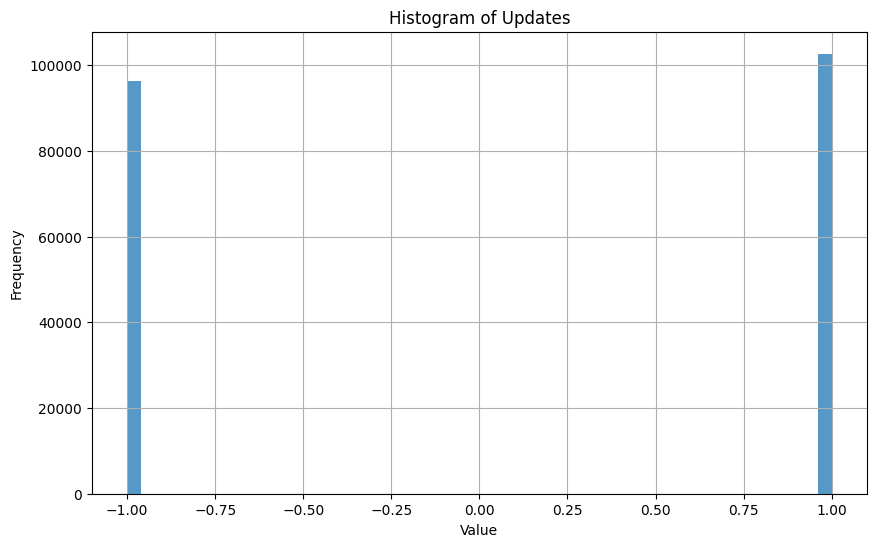

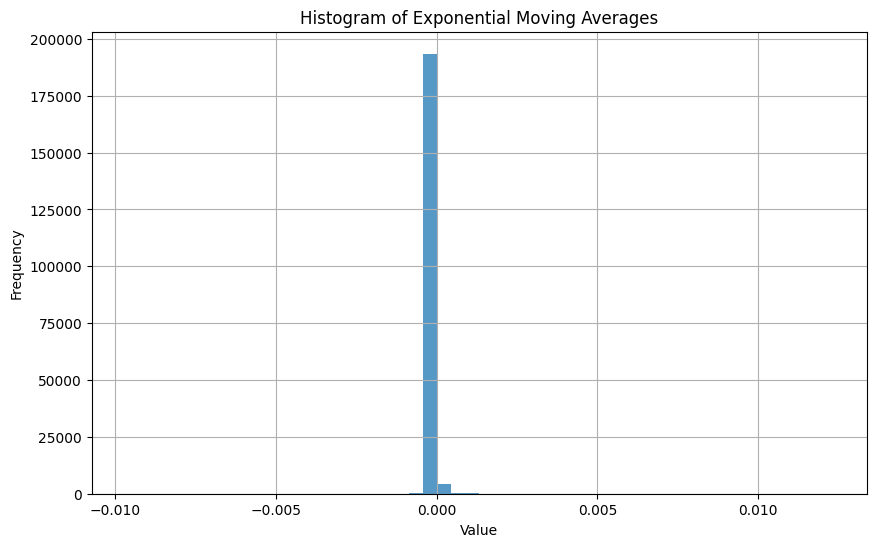

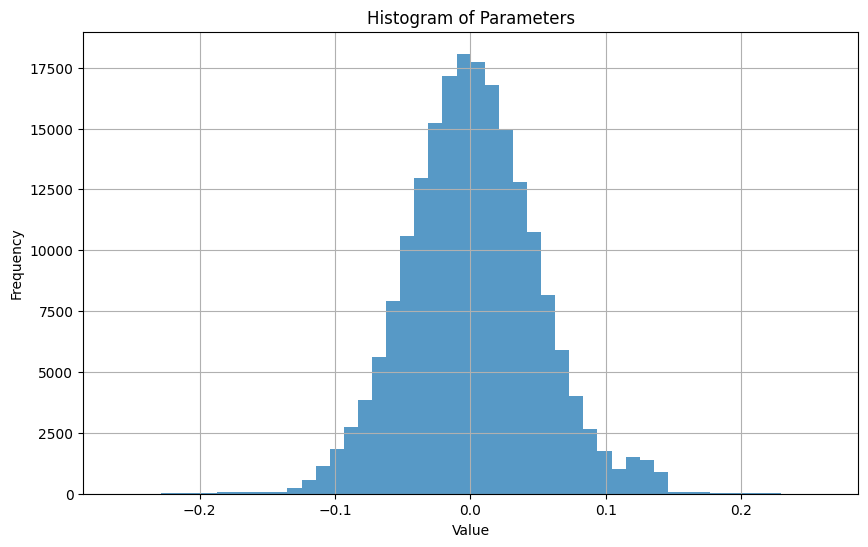

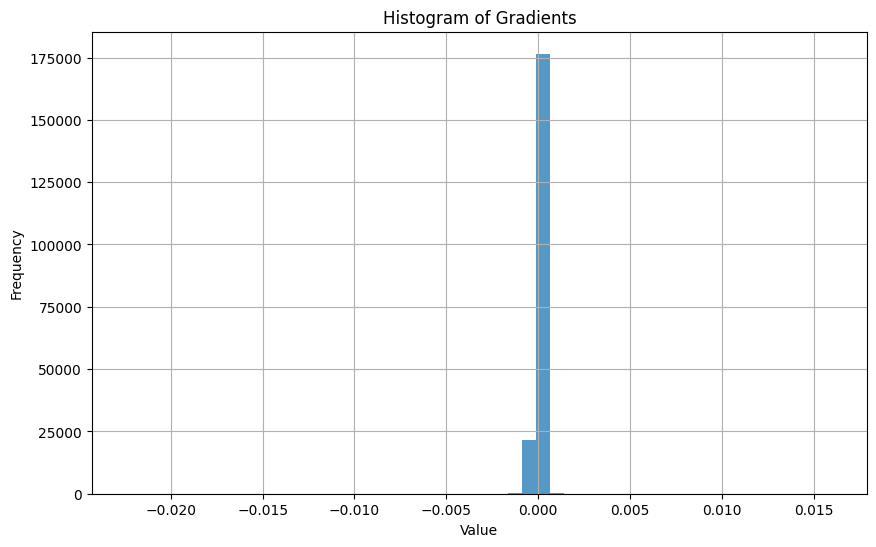

In [6]:
import matplotlib.pyplot as plt

# Function to concatenate and flatten tensors in a list
def tensors_to_vector(tensor_list):
    if tensor_list:
        # Concatenate tensors along dimension 0 and then flatten the result to make it 1D
        return torch.cat(tensor_list).flatten()
    else:
        return torch.tensor([])  # Return an empty tensor if list is empty

# Assuming 'dicts' is the dictionary containing lists of tensors
dicts =  torch.load("./results/dicts_2024-05-28_12-47-57.pth")
updates_vector = tensors_to_vector(dicts['update'])
exp_avg_vector = tensors_to_vector(dicts['exp_avg'])
params_vector = tensors_to_vector(dicts['p'])
grads_vector = tensors_to_vector(dicts['grad'])

# Function to plot a histogram
def plot_histogram(data, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data.numpy(), bins=50, alpha=0.75)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histograms for each vector
plot_histogram(updates_vector, "Histogram of Updates")
plot_histogram(exp_avg_vector, "Histogram of Exponential Moving Averages")
plot_histogram(params_vector.detach(), "Histogram of Parameters")
plot_histogram(grads_vector, "Histogram of Gradients")


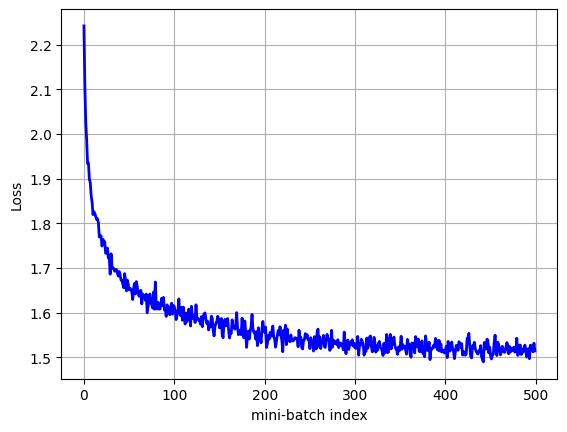

In [25]:
# Plot loss curve
import matplotlib.pyplot as plt
plt.plot(losses, label='Loss', color='blue', linewidth=2)
plt.ylabel('Loss')
plt.xlabel('mini-batch index')
plt.grid()
plt.show()

(-0.14743202924728394, 0.0006700347876176238)
(0.019372262060642242, 0.00011592397640924901)
(0.0546911247074604, 0.00020896998466923833)
(0.04787437990307808, -0.0006130212568677962)
(0.059152308851480484, 0.0001559317170176655)
(-0.21568244695663452, 0.0007850313559174538)
(0.036813247948884964, -0.00012130766117479652)
(-0.01942245475947857, -2.04544048756361e-05)
(0.10820576548576355, -0.0004924368113279343)
(0.0900668352842331, 3.543696948327124e-05)
(-0.09177984297275543, 2.4131550162564963e-05)
(-0.06767021119594574, -0.00017108736210502684)
(0.18149352073669434, -0.0008957391837611794)
(-0.16946858167648315, -0.00013536951155401766)
(0.08303430676460266, -8.493561472278088e-05)
(-0.15648049116134644, -4.219813854433596e-05)
(0.09276123344898224, -8.027475996641442e-05)
(0.0826311931014061, -7.417199958581477e-05)
(0.20028714835643768, -0.0002622906176839024)
(0.17331364750862122, -0.0019938501063734293)
(-0.026255620643496513, 0.0009413466905243695)
(-0.21294215321540833, 0.001

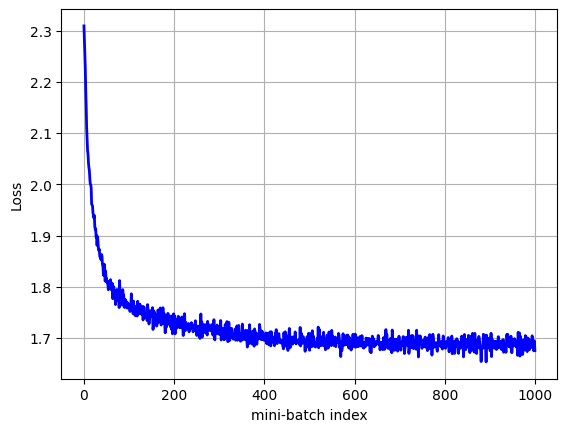

In [4]:
import torch
import matplotlib.pyplot as plt
dd = torch.load("./results/dicts_2024-05-28_12-47-57.pth")

p_tensor = dd["p"][2]
grad_tensor = dd["grad"][2]

# Check that both tensors have the same length
if p_tensor.size(0) != grad_tensor.size(0):
    print("Error: Parameter and Gradient tensors do not match in size.")
else:
    # Iterate over each index i and print the paired values
    for i in range(p_tensor.size(0)):
        print(f"({p_tensor[i].item()}, {grad_tensor[i].item()})")


ll = torch.load("./results/losses_2024-05-27_21-42-42.pth")
plt.plot(ll, label='Loss', color='blue', linewidth=2)
plt.ylabel('Loss')
plt.xlabel('mini-batch index')
plt.grid()
plt.show()

In [16]:
86017 -92159 -1 

-6143